In [15]:
import csv
def split_csv(input_file, even_output_file, odd_output_file):
    with open(input_file, 'r') as infile, \
         open(even_output_file, 'w', newline='') as even_outfile, \
         open(odd_output_file, 'w', newline='') as odd_outfile:

        reader = csv.reader(infile)
        even_writer = csv.writer(even_outfile)
        odd_writer = csv.writer(odd_outfile)

        # Read the first row and write it to both output files
        first_row = next(reader)
        even_writer.writerow(first_row)
        odd_writer.writerow(first_row)

        for index, row in enumerate(reader):
            if index % 2 == 0:
                even_writer.writerow(row)
            else:
                odd_writer.writerow(row)

# Example usage:
input_file = '/content/pretraining_history_llama.csv'  # Replace 'input.csv' with your input CSV file name
even_output_file = 'train.csv'
odd_output_file = 'val.csv'

split_csv(input_file, even_output_file, odd_output_file)

In [16]:
import csv

def filter_columns(input_file, output_file):
    with open(input_file, 'r') as infile, \
         open(output_file, 'w', newline='') as outfile:

        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Read the header row
        header = next(reader)

        # Find the index of 'step' and 'loss' columns
        step_index = header.index('step')
        loss_index = header.index('loss')

        # Write the header with 'step' and 'loss' columns
        writer.writerow(['step', 'loss'])
        reader = list(reader)[:-1]
        # Iterate through the rows, keeping only 'step' and 'loss' columns
        for row in reader:
            filtered_row = [row[step_index], row[loss_index]]
            writer.writerow(filtered_row)

# Example usage:
input_file = 'train.csv'
output_file = 'train_filt.csv'

filter_columns(input_file, output_file)

In [17]:
import csv

def filter_columns(input_file, output_file):
    with open(input_file, 'r') as infile, \
         open(output_file, 'w', newline='') as outfile:

        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Read the header row
        header = next(reader)

        # Find the index of 'step' and 'loss' columns
        step_index = header.index('step')
        loss_index = header.index('eval_loss')

        # Write the header with 'step' and 'loss' columns
        writer.writerow(['step', 'eval_loss'])

        # Iterate through the rows, keeping only 'step' and 'loss' columns
        for row in reader:
            filtered_row = [row[step_index], row[loss_index]]
            writer.writerow(filtered_row)

# Example usage:
input_file = 'val.csv'
output_file = 'val_filt.csv'

filter_columns(input_file, output_file)

In [18]:
import csv

def merge_csv(step_loss_file, step_eval_loss_file, output_file):
    with open(step_loss_file, 'r') as file1, open(step_eval_loss_file, 'r') as file2, \
         open(output_file, 'w', newline='') as outfile:

        reader1 = csv.reader(file1)
        reader2 = csv.reader(file2)
        writer = csv.writer(outfile)

        # Skip header rows
        next(reader1)
        next(reader2)

        # Write header to output file
        writer.writerow(['step', 'loss', 'eval_loss'])

        # Merge corresponding rows from both files
        for row1, row2 in zip(reader1, reader2):
            merged_row = [row1[0], row1[1], row2[1]]  # Assuming step is the first column in both files
            writer.writerow(merged_row)

# Example usage:
step_loss_file = 'train_filt.csv'  # Replace with your file containing step and loss data
step_eval_loss_file = 'val_filt.csv'  # Replace with your file containing step and eval_loss data
output_file = 'llama_data.csv'  # Output file to store the merged data

merge_csv(step_loss_file, step_eval_loss_file, output_file)


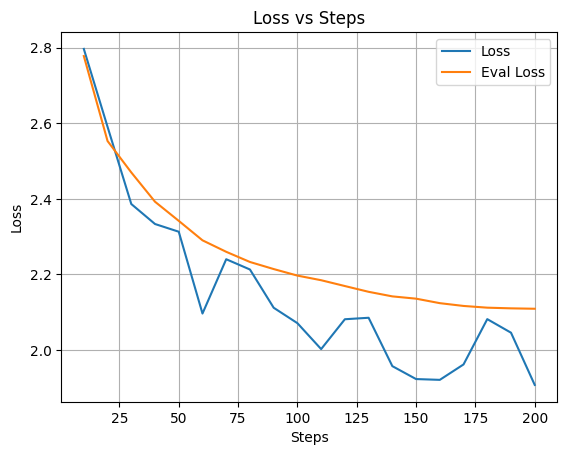

In [20]:
import csv
import matplotlib.pyplot as plt

def plot_loss_vs_steps(step_loss_file):
    steps_loss = []
    loss_values = []
    eval_loss_values = []

    # Read data from the first file
    with open(step_loss_file, 'r') as file1:
        reader1 = csv.reader(file1)
        next(reader1)  # Skip header
        for row in reader1:
            steps_loss.append(float(row[0]))  # Assuming step is the first column
            loss_values.append(float(row[1]))  # Assuming loss is the second column
            eval_loss_values.append(float(row[2]))

    # Plotting
    plt.plot(steps_loss, loss_values, label='Loss')
    plt.plot(steps_loss, eval_loss_values, label='Eval Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Loss vs Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
step_loss_file = 'llama_data.csv'  # Replace with your file containing step and loss data

plot_loss_vs_steps(step_loss_file)


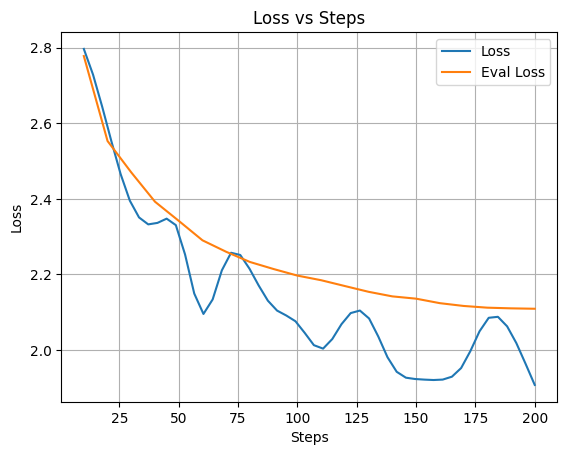

In [97]:
import csv
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

def plot_loss_vs_steps(step_loss_file):
    steps_loss = []
    loss_values = []
    eval_loss_values = []

    # Read data from the first file
    with open(step_loss_file, 'r') as file1:
        reader1 = csv.reader(file1)
        next(reader1)  # Skip header
        for row in reader1:
            steps_loss.append(float(row[0]))  # Assuming step is the first column
            loss_values.append(float(row[1]))  # Assuming loss is the second column
            eval_loss_values.append(float(row[2]))

    x_new = np.linspace(10, 200, 50)
    bspline = interpolate.make_interp_spline(steps_loss, loss_values)
    y_new = bspline(x_new)


    plt.plot(x_new, y_new, label='Loss')
    plt.plot(steps_loss, eval_loss_values, label='Eval Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Loss vs Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
step_loss_file = 'llama_data.csv'  # Replace with your file containing step and loss data

plot_loss_vs_steps(step_loss_file)


In [ ]:
|